# **Práctica 4 - PageRank y Relevance Feedback**
### **Miguel Carreras Lahoz y Adrián Rubio Pintado**

In [ ]:
import numpy as np
import pandas as pd

# **EJERCICIO 1:**
**PageRank: Calcular PageRank en el subgrafo web formado por las páginas accesibles desde (e incluyendo) esta dirección.** 


## **Ejercicio 1.1**
 **Tomar r = 0.1, N = nº de páginas en el subgrafo, y 0.3 como valor inicial de PageRank para empezar a iterar.**

Dibujamos el grafo de links entre páginas dado:

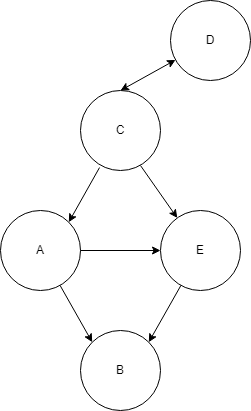

Creamos la matriz de adyacencia A para ayudarnos a construir la matriz M

In [ ]:
ady = np.array([
                [0,1,0,0,1],
                [0,0,0,0,0],
                [1,0,0,1,1],
                [0,0,1,0,0],
                [0,1,0,0,0],
              ])

Construimos la matriz de hiperenlaces M:

In [ ]:
M = np.array([
                [0,1/2,0,0,1/2],    #A
                [0.,0,0,0,0],       #B
                [1/3,0,0,1/3,1/3],  #C
                [0.,0,1,0,0],       #D
                [0.,1,0,0,0],       #E
              ])

Sobre la matriz M hacemos un primer ajuste, transofomándola en la matriz estocástica S tal que:
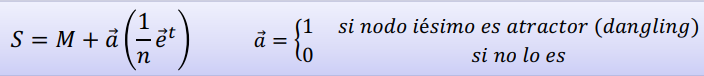

In [ ]:
def calc_S_matrix(M):
  n = M.shape[0]
  S = M.copy()
  S[S.sum(axis=1) == 0] = n*[1./n]
  return S

In [ ]:
S = calc_S_matrix(M)

A partir de la matriz S, calculamos la matriz G, definida como:

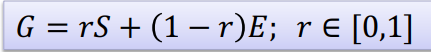

Siendo E la matriz de teleportación uniforme donde todos los destinos son equiprobables
$$ E = \frac{1}{n} \vec{e}\vec{e}^{t} $$

In [ ]:
def calc_G_matrix(M,r, E = None):
  '''
    Args:
      E: if None , teleportación uniforme, si no, una personalizada
  '''
  assert (r >=0 and r <=1 ), 'r debe de estar entre 0 y 1'

  S = calc_S_matrix(M)
  n = S.shape[0]
  if(E is None):
    E = np.ones((n,n)) * 1/n #Matriz de teleportación uniforme
    
  G = r* S + (1-r)* E
  return G

In [ ]:
calc_G_matrix(S,0.85)

array([[0.03      , 0.455     , 0.03      , 0.03      , 0.455     ],
       [0.2       , 0.2       , 0.2       , 0.2       , 0.2       ],
       [0.31333333, 0.03      , 0.03      , 0.31333333, 0.31333333],
       [0.03      , 0.03      , 0.88      , 0.03      , 0.03      ],
       [0.03      , 0.88      , 0.03      , 0.03      , 0.03      ]])

Ahora procedemos a calcular el vector de Pagerank multiplicando iteradamente:

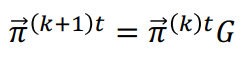

In [ ]:
def calcula_page_rank(M,max_iter, r, valor_ini_PR = None,E = None, verbose = False):
  '''Devuelve el Pagenrank dada la matriz de hiperenlaces M y un número máximo de iteraciones
      a calcular.


      M: Matriz de hiperenlaces
      max_iter: Número máximo de Iteraciones Pagerank
      r: Hiperparámetro de telerportación del "surfista aleatorio",
        para evitar sumideros y ciclos
      valor_ini_PR: valor inicial de pagerank, si None entonces se sigue la propuesta 
          original, es decir, pi_ini = 1/n * vector_unitario
      E: if None , teleportación uniforme, si no, una personalizada
      verbose: if Tru prints iteration evolution
  '''
  assert max_iter > 0, 'Número de iteraciones debe de ser mayor de 0'

  n = M.shape[0]
  if(valor_ini_PR is None):
    pi = (1/n) * np.ones(n)
  else:
    pi = np.full(n, valor_ini_PR)

  if(verbose):
    print('Pagerank Inicial:', pi)

  G = calc_G_matrix(M,r,E)
  for i in range(max_iter):
    pi = pi.T @ G
    if(verbose):
      print('Iteración', i+1, ',   Pagerank: ', pi)

  return pi




In [ ]:
vector_pr = calcula_page_rank(M,max_iter=8, r = 0.1, valor_ini_PR = 0.3, verbose = True )

Pagerank Inicial: [0.3 0.3 0.3 0.3 0.3]
Iteración 1 ,   Pagerank:  [0.286 0.321 0.306 0.286 0.301]
Iteración 2 ,   Pagerank:  [0.28662 0.32082 0.30502 0.28662 0.30092]
Iteración 3 ,   Pagerank:  [0.28658373 0.3208394  0.3050784  0.28658373 0.30091473]
Iteración 4 ,   Pagerank:  [0.28658607 0.32083745 0.30507516 0.28658607 0.30091525]
Iteración 5 ,   Pagerank:  [0.28658592 0.32083758 0.30507536 0.28658592 0.30091522]
Iteración 6 ,   Pagerank:  [0.28658593 0.32083757 0.30507534 0.28658593 0.30091523]
Iteración 7 ,   Pagerank:  [0.28658593 0.32083757 0.30507534 0.28658593 0.30091523]
Iteración 8 ,   Pagerank:  [0.28658593 0.32083757 0.30507534 0.28658593 0.30091523]


Para el caso particular que queremos particular, vemos como el algoritmo converge desde la iteración 6. Obteniendo el Pagerank de:

Pagerank(A) = 0.28658593

Pagerank(B) = 0.32083757

Pagerank(C) = 0.30507534

Pagerank(D) = 0.28658593

Pagerank(E) = 0.30091523





   


## **Ejercicio 1.2**
**Con los mismos parámetros del apartado anterior, personalizar PageRank para un usuario que tiene sólo las páginas 'A.html' y 'D.html' entre sus preferencias.**

El surfita elige con probabilidad (1-r) teleportarse aleatoriamente a una página. Hasta ahora escogíamos la matriz de teleportación E con probabilidad uniforme para las 5 páginas. Sien embargo, para el caso particular, ahora solo 2 de las 5 deberían tener probabilidad en esa matriz. Repartimos de nuevo la probabilidad equitativamente entre las párginas A y D, es decir, probabilidad igual a 1/2 para ellas y 0 para el resto en la matriz E.
Creamos la matriz E personalizada:

In [ ]:
n = 5
E_personalizada =   np.zeros((n,n),dtype = np.float64) 
E_personalizada[:, 0] =  np.full(n,1/2)
E_personalizada[:, 3] =   np.full(n,1/2)
E_personalizada

array([[0.5, 0. , 0. , 0.5, 0. ],
       [0.5, 0. , 0. , 0.5, 0. ],
       [0.5, 0. , 0. , 0.5, 0. ],
       [0.5, 0. , 0. , 0.5, 0. ],
       [0.5, 0. , 0. , 0.5, 0. ]])

In [ ]:
vector_pr_personalizado = calcula_page_rank(M,max_iter=10, r = 0.1, valor_ini_PR = 0.3, E = E_personalizada , verbose = True )

Pagerank Inicial: [0.3 0.3 0.3 0.3 0.3]
Iteración 1 ,   Pagerank:  [0.691 0.051 0.036 0.691 0.031]
Iteración 2 ,   Pagerank:  [0.67722 0.03867 0.07012 0.67722 0.03677]
Iteración 3 ,   Pagerank:  [0.67811073 0.0383114  0.0684954  0.67811073 0.03697173]
Iteración 4 ,   Pagerank:  [0.67804941 0.03836894 0.0685773  0.67804941 0.03695494]
Iteración 5 ,   Pagerank:  [0.67805329 0.03836534 0.06857232 0.67805329 0.03695576]
Iteración 6 ,   Pagerank:  [0.67805305 0.03836555 0.06857264 0.67805305 0.03695572]
Iteración 7 ,   Pagerank:  [0.67805307 0.03836554 0.06857262 0.67805307 0.03695572]
Iteración 8 ,   Pagerank:  [0.67805306 0.03836554 0.06857262 0.67805306 0.03695572]
Iteración 9 ,   Pagerank:  [0.67805306 0.03836554 0.06857262 0.67805306 0.03695572]
Iteración 10 ,   Pagerank:  [0.67805306 0.03836554 0.06857262 0.67805306 0.03695572]


En este caso vemos como termina de converger en la iteración 8. Obteniendo el Pagerank personalizado:

Pagerank(A) = 0.67805306 

Pagerank(B) = 0.03836554 

Pagerank(C) = 0.06857262 

Pagerank(D) = 0.67805306 

Pagerank(E) = 0.03695572


Vemos como ahora el Pagerank de A y D es ha crecido siendo el más alto, mientras que el del resto ha decaído como era de esperar.

# **Ejercicio 5 (OPCIONAL):** 
**Probar valores distintos de r para calcular PageRank.**

Para los valores del ejercicio 1.1 y con un número maximo de iteraciones por cada valor de r de 12 ejecutamos pagerank:

In [ ]:
r_values = [0. ,0.1,  0.25 , 0.5 , 0.75 , 0.9 ,1. ]

for r in r_values:
  print('----------------------------------------')
  print('Valor de r = ' ,r)
  vector_pr = calcula_page_rank(M,max_iter=12, r = r, valor_ini_PR = 0.3, verbose = True )
  print('\n----------------------------------------\n\n\n')


----------------------------------------
Valor de r =  0.0
Pagerank Inicial: [0.3 0.3 0.3 0.3 0.3]
Iteración 1 ,   Pagerank:  [0.3 0.3 0.3 0.3 0.3]
Iteración 2 ,   Pagerank:  [0.3 0.3 0.3 0.3 0.3]
Iteración 3 ,   Pagerank:  [0.3 0.3 0.3 0.3 0.3]
Iteración 4 ,   Pagerank:  [0.3 0.3 0.3 0.3 0.3]
Iteración 5 ,   Pagerank:  [0.3 0.3 0.3 0.3 0.3]
Iteración 6 ,   Pagerank:  [0.3 0.3 0.3 0.3 0.3]
Iteración 7 ,   Pagerank:  [0.3 0.3 0.3 0.3 0.3]
Iteración 8 ,   Pagerank:  [0.3 0.3 0.3 0.3 0.3]
Iteración 9 ,   Pagerank:  [0.3 0.3 0.3 0.3 0.3]
Iteración 10 ,   Pagerank:  [0.3 0.3 0.3 0.3 0.3]
Iteración 11 ,   Pagerank:  [0.3 0.3 0.3 0.3 0.3]
Iteración 12 ,   Pagerank:  [0.3 0.3 0.3 0.3 0.3]

----------------------------------------



----------------------------------------
Valor de r =  0.1
Pagerank Inicial: [0.3 0.3 0.3 0.3 0.3]
Iteración 1 ,   Pagerank:  [0.286 0.321 0.306 0.286 0.301]
Iteración 2 ,   Pagerank:  [0.28662 0.32082 0.30502 0.28662 0.30092]
Iteración 3 ,   Pagerank:  [0.28658373

Para un valor de r = 0  nos quedamos con el mismo pagerank que el de partida. Y a medida que ampliamos el valor de r, vemos que cada vez tarda más iteraciones en estabilizarse los valores pagerank, es decir, en converger.

Tiene sentido, ya que cuanto más grande es r, el surfista menos hace saltos aleatorios, y sigue la probabilidad de distribución de la matriz de hiperenlaces modificada. Es decir, que un nodo sumidero como es la página B,  acumula más Pagerank cuanto menos veces usamos la teleportación aleatoria del surfista, es decir, cuanto mayor es r.

# **EJERCICIO 2**
**Relevance Feedback. Sobre alguna consulta que hayas usado en prácticas anteriores (para la que tengas calculada los valores de TF-IDF), aplicar relevance feedback (una iteración) según las siguientes opciones:**

Con Relevance Feedback y/o Query Expansion, buscamos mejorar las métricas de un ranking(como lo son Precision o nDCG) dada una consulta y una posterior retroalimentación de el usuario.

## **Ejercicio 2.1**
**Sistema/ránking de partida**


Escogemos la **consulta: 'postres típicos por comunidad autónoma'**


In [ ]:
query = ['postres', 'típicos', 'por', 'comunidad', 'autónoma']

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving q9.csv to q9 (1).csv


In [ ]:
q9 = pd.read_csv('q9.csv')
q9 = q9.drop(['Indicaciones'] , axis=1)
q9 = q9.drop(['Ignorar_campo'] , axis=1)
q9 = q9.drop(['Unnamed: 5'] , axis=1)
q9['docid']= [ i for i in range(q9.shape[0]) ]


In [ ]:
q9.head()

,qid,URL,Nivel_de_acierto,docid
0,9,https://benjaminknowles0.blogspot.com/2021/10/...,1,0
1,9,https://cocina.facilisimo.com/d/un-dulce-de-ca...,1,1
2,9,https://comococinar.club/los-dulces-tipicos-de...,2,2
3,9,https://eco-turismo.info/gastronomia/postres-t...,2,3
4,9,https://okdiario.com/recetas/dia-mundial-postr...,2,4


Como tenemos el ranking, pero no el tf-idf guardado, lo calculamos. Primero mostramos el ranking para la consulta inicial.


### **VSM**

In [ ]:
import math

class VSM:
  def __init__(self, freqvector, docfreqs):
    self.freqvector = freqvector
    self.docfreqs = docfreqs

  def search(self, q):
    # Calculamos el producto tf-idf
    # docs = {url:[word for word in vocabulary] for url in urls}
    # for url in urls:
      # docs[url] = {word: self.tf(word,url)*self.idf(word) for word in vocabulary} # Formato diccionario
    docs = {url:[self.tf(word,url)*self.idf(word) for word in vocabulary] for url in  self.freqvector.keys() } # Formato array
    self.docs = docs

    # Calculamos los cosenos de todos los documentos.
    ranking = [(url, self.dotproduct(url, q) / self.module(url)) for url in self.freqvector]
    # Eliminamos los documentos con coseno = 0.
    ranking = [(url, cos) for url, cos in ranking if cos > 0]
    # Ordenamos.
    ranking.sort(key=lambda x: x[1], reverse=True)
    return ranking
    
  def dotproduct(self, url, q):
    # Código aquí
    q = np.array([1 if word in q else 0 for word in vocabulary])

    # product = np.sum(self.docs[url][word] for word in q) # Formato diccionario
    product = self.docs[url]@q
    return product 

  def module(self, url):
    # Código aquí
    return np.linalg.norm(self.docs[url])


  def tf(self, word, url):
    # Código aquí
    if(word in self.freqvector[url]):
      return 1 + np.log2(self.freqvector[url][word]) if self.freqvector[url][word] > 0 else 0
    else:
      return 0

    

  def idf(self,word):
    # Código aquí
    if(word in self.docfreqs):
      return np.log2(len(self.freqvector.keys())/self.docfreqs[word])
    else:
      return 0

  def tf_idf(self):

    df = pd.DataFrame({"term":[word for word in  self.docfreqs.keys()]})

    for  url in self.freqvector:
      col = [ self.tf( word, url) * self.idf(word) for word in self.docfreqs.keys() ]
      df[url] = col
    return df


  def get_q_weights(self,q):
    q_weights = np.array([1 if word in q else 0 for word in vocabulary])

    #Debug
    #words = [word  for word in vocabulary if word in q ]
    #print('debugggg, palabras:', words)

    return q_weights

  #This last 2 functions for custom q for relevance feedback and query expansion

  def search_with_custom_q(self,q):
    '''Now q is not a list of words, its directly the query weights 
    '''

    docs = {url:[self.tf(word,url)*self.idf(word) for word in vocabulary] for url in  self.freqvector.keys() } # Formato array
    self.docs = docs

    # Calculamos los cosenos de todos los documentos.
    ranking = [(url, self.dot_custom_product(url, q) / self.module(url)) for url in self.freqvector]
    # Eliminamos los documentos con coseno = 0.
    ranking = [(url, cos) for url, cos in ranking if cos > 0]
    # Ordenamos.
    ranking.sort(key=lambda x: x[1], reverse=True)
    return ranking
   
  def dot_custom_product(self,url, q):
    product = self.docs[url]@q
    return product 

Obtenemos el texto y lo parseamos

In [ ]:
import requests 


from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry
import urllib3
from bs4 import BeautifulSoup
from collections import Counter
import re

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

headers = {
        'Access-Control-Allow-Origin': '*',
        'Access-Control-Allow-Methods': 'GET',
        'Access-Control-Allow-Headers': 'Content-Type',
        'accept': '*/*',
        'accept-encoding': 'gzip, deflate',
        'accept-language': 'en,mr;q=0.9',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36'}

data =  q9.copy(deep=True)

headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/68.0.3440.106 Safari/537.36',}
texts = []  

for j in range(len(q9)):
  url = q9['URL'][j]
  content = requests.get(url,headers=headers,  verify=False).content
  soup = BeautifulSoup(content, "lxml")
  for script in soup(["script", "style"]): script.extract()
  text = soup.text.lower()
  texts.append(text)

data.insert(3, "text", texts)


El ranking obtenido mediante el modelo vectorial, como la **consulta inicial**, es el siguiente:

In [ ]:

vectorial_outputs =  pd.DataFrame(columns=['qid', 'URL',	'Posicion',	'Score'])


texts_2 = data['text'].to_list()
#urls_2 = data['URL'].to_list()
urls_2 = data['docid'].to_list()

freqvector = {url:Counter([word for word in re.findall(r"[^\W\d_]+|\d+", text.lower()) ]) for url, text in zip(urls_2, texts_2)}
# Document frequency para cada palabra del vocabulario.
vocabulary = set()
for word in freqvector.values(): vocabulary.update(word)
docfreqs = {word:len([url for url in freqvector if word in freqvector[url]]) for word in vocabulary}
# Frecuencia total para cada palabra del vocabulario.
wordfreqs = {word:sum([freqvector[url][word] for url in freqvector if word in freqvector[url]]) for word in vocabulary}
#Probamos su query
print('\n--------------------------------------')


i = 0
print('\nModelo vectorial')
vsm = VSM(freqvector, docfreqs)
print('Score\t,' 'Doc_id')
for url, score in vsm.search(query):
  i = i+1
  print(score, url)
  df2 = { 'docid': url, 'Posicion': i, 'Score': score}#Imrimimos por comodidad el docid y en vez del la url para identificar documentos
  vectorial_outputs = vectorial_outputs.append(df2, ignore_index = True)



--------------------------------------

Modelo vectorial
Score	,Doc_id
0.057538285077723884 9
0.04639822103156495 4
0.04543578548590524 2
0.04395342506502345 16
0.041684084821071096 17
0.0404343853473666 8
0.03513695103164605 19
0.030660193576588078 1
0.027219270905435095 20
0.025410876903051167 21
0.024628467909633023 13
0.02404634274929965 7
0.023430436548404113 6
0.022338623262946174 0
0.02218309909899856 3
0.02133553204658699 10
0.021042202210584376 11
0.01929734805453448 14
0.015995839602010287 18
0.01070260240179369 12
0.00958740720438529 15


In [ ]:
matriz_tfidf = vsm.tf_idf()

#### **Matriz TF-IDF completa:(terminos con doc ids)**

In [ ]:
matriz_tfidf

,term,0,1,2,3,4,5,6,7,8,...,12,13,14,15,16,17,18,19,20,21
0,cocinando,0.000000,3.459432,0.0,0.0,0.000000,0.0,0.000000,6.918863,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,melaza,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2,surexpresoestación,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,4.459432
3,gora,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,8.918863,0.000000
4,acompañar,0.000000,0.000000,0.0,0.0,1.652077,0.0,1.652077,0.000000,1.652077,...,0.000000,0.0,1.652077,0.0,0.0,0.0,1.652077,3.304153,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5559,rociado,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,4.459432,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
5560,seguridad,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
5561,pita,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,8.918863,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
5562,3,4.459432,0.000000,1.0,0.0,0.000000,0.0,2.584963,2.584963,0.000000,...,0.000000,1.0,1.000000,2.0,0.0,0.0,1.000000,1.000000,1.000000,0.000000


Mostamos solo la matriz TF-IDF para los términos contenidos en la consulta

In [ ]:
query_colum = [1 if w in query else 0 for w in matriz_tfidf['term']]
matriz_tfidf_with_q = matriz_tfidf.copy()
matriz_tfidf_with_q['q'] = query_colum
matriz_tfidf_with_q = matriz_tfidf_with_q.loc[matriz_tfidf_with_q['q'] != 0].reset_index(drop=True)
matriz_tfidf_with_q

,term,0,1,2,3,4,5,6,7,8,...,13,14,15,16,17,18,19,20,21,q
0,autónoma,0.000000,0.918863,1.647045,0.000000,1.647045,0.0,1.378295,1.647045,1.187614,...,1.378295,0.918863,0.459432,1.837726,1.187614,0.000000,1.378295,0.459432,0.459432,1
1,postres,1.923440,0.868520,1.251227,1.251227,1.327377,0.0,0.289507,0.289507,1.251227,...,0.000000,0.000000,0.000000,1.291035,0.748364,1.519310,0.289507,1.158026,1.420577,1
2,comunidad,0.412511,0.456777,0.594280,0.456777,0.613188,0.0,0.573379,0.750691,0.573379,...,0.492945,0.573379,0.412511,0.630449,0.550014,0.000000,0.594280,0.355441,0.275007,1
3,por,0.201343,0.290063,0.346975,0.361901,0.341441,0.0,0.268457,0.419325,0.335571,...,0.134228,0.341441,0.290063,0.352210,0.299291,0.386235,0.382580,0.307716,0.299291,1
4,típicos,0.370709,0.268457,0.173488,0.299291,0.322642,0.0,0.201343,0.411362,0.279861,...,0.240602,0.307716,0.201343,0.307716,0.173488,0.268457,0.374830,0.240602,0.299291,1


### **RELEVANCE FEEDBACK:Rocchio**

Mediante **Relevance Feedback**, hacemos un reweighting de los pesos la consulta del usuario, **en base a los documentos** que el usuario considera **relevantes**, una vez que se le han ofrecido los resultados de la consulta. **A diferencia del método Query expansion**, que consiste en **aumentar los terminos de la consulta**, en base a una **retroalimentción** del usuario basada en **términos relevantes relacionados con la consulta original** [1]


Para esta sección elegimos la opción: 
    **Clicks como feedback de relevancia implícita positiva usando el log de clicks de la práctica 2.**

Usando el archivo **engagement-log.txt** vemos los documentos que han sido clicados y los consideramos como relevantes. Dado que en el fichero no aparecen logs de los no clicados, los que no aparecen los consideraremos como no relavantes.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving engagement-log.txt to engagement-log (1).txt


In [ ]:
rels_clicks = pd.read_csv('engagement-log.txt', sep='\t')

In [ ]:
rels_clicks = rels_clicks.loc[rels_clicks['qid']==9].reset_index(drop= True)[['docid','click','purchase']]
rels_clicks = rels_clicks.rename(columns={"docid": "URL"}).drop_duplicates()

In [ ]:
rels_clicks

,URL,click,purchase
0,https://www.niusdiario.es/vida/gastronomia/pos...,1,1
1,https://eco-turismo.info/gastronomia/postres-t...,1,1
2,https://www.65ymas.com/ocio/gastronomia/espana...,1,1
4,https://www.estudiahosteleria.com/blog/novedad...,1,1
5,https://www.alimente.elconfidencial.com/gastro...,1,1
7,https://www.lugarnia.com/gastronomia/postres-m...,1,1
8,https://www.tapasmagazine.es/los-postres-tipic...,1,1
13,https://okdiario.com/recetas/dia-mundial-postr...,1,1


In [ ]:
len(rels_clicks)

8

**Tenemos 8 documentos relevantes de 21 mediante este criterio.**

Dado que todos tienen también el flag de purchase activado, no vamos a hacer ningun cribado y cogeremos los 16 como relevantes.

Concatenamos las URL con los doc ids creados para la relevancia:

In [ ]:
data2 = data.merge(rels_clicks , how= 'left' , on= 'URL').fillna(0)
data2 = data2[['docid', 'URL','click']]
data2 = data2.rename(columns={"click": "Relevante"}).drop_duplicates()
data2

,docid,URL,Relevante
0,0,https://benjaminknowles0.blogspot.com/2021/10/...,0.0
1,1,https://cocina.facilisimo.com/d/un-dulce-de-ca...,0.0
2,2,https://comococinar.club/los-dulces-tipicos-de...,0.0
3,3,https://eco-turismo.info/gastronomia/postres-t...,1.0
4,4,https://okdiario.com/recetas/dia-mundial-postr...,1.0
5,5,https://quizlet.com/gb/535615686/platos-tipico...,0.0
6,6,https://unitedcaro.com/platos-tipicos-comunida...,0.0
7,7,https://viajegastronomico.com/platos-tipicos-e...,0.0
8,8,https://www.65ymas.com/ocio/gastronomia/espana...,1.0
9,9,https://www.alimente.elconfidencial.com/gastro...,1.0


Ahora que ya tenemos los documentos relevantes para la consulta, debemos de mejorar el ranking inicial obtenido, dada la retroalimentación de documentos relevantes para la consulta. Para ello vamos a usar el método Rocchio Estandar, tal que:

$$
\boldsymbol{q_m} = \alpha \boldsymbol{q} + \frac{\beta}{|D_r|}\sum_{\boldsymbol d\in D_r}\boldsymbol{d} - \frac{\gamma}{|D_n|}\sum_{\boldsymbol d\in D_n}\boldsymbol{d}.
$$

Siendo $q_{m}$ el vector de pesos expandido de la query y $d_j$ los pesos de los términos-doc de la matriz tf-idf separados en relevantes y no relevantes, y $q$ los pesos de la query original.
Alpha,betta y gamma parámetros de ajuste.

Escribimos el código para el método rocchio:

In [ ]:
class Rocchio:

  def __init__(self,alpha, betta, gamma, data, matrix_tf_idf):
    '''
      Args
        ...
        data: dataframe con los doc ids y la revevancia
        matrix_tf_idf: matriz tf_idf precalculada para los datos
    '''
    self.alpha = alpha
    self.betta =betta
    self.gamma = gamma
    self.data = data
    self.matrix_tf_idf = matrix_tf_idf

    self.n_relevantes = data.loc[data['Relevante'] > 0 ]['URL'].shape[0]
    self.n_no_relevantes = data.shape[0] - self.n_relevantes

    self.doc_ids_relevantes = data.loc[data['Relevante'] > 0 ]['docid'].to_list()
    self.doc_ids_no_relevantes = data.loc[data['Relevante'] == 0 ]['docid'].to_list()

  def amplia_query(self,q):
    ''' Para una consulta q (lista de términos), devuelve la consulta q_m (pesos de la consulta ajustados)
    '''

    #Primero debemos de calcular el vector de la consulta original respecto a la matriz tf-idf(1's donde coincidan los términos de la query)
    q0_w = [ 1 if word in q else 0 for word in self.matrix_tf_idf['term'].to_list()]

    q_m = [] #Consulta ampliada por reweighting

    for i in range(self.matrix_tf_idf.shape[0]): #iteramos sobre cada término

      sumatorio_relevantes = sum(self.matrix_tf_idf.iloc[i][self.doc_ids_relevantes].to_list())
      sumatorio_no_relevantes = sum(self.matrix_tf_idf.iloc[i][self.doc_ids_no_relevantes].to_list())

      termino_relevantes = (self.betta / self.n_relevantes) * sumatorio_relevantes
      termino_no_relevantes = (self.gamma / self.n_no_relevantes) * sumatorio_no_relevantes

      rocchio = (self.alpha * q0_w[i]) + termino_relevantes - termino_no_relevantes

      q_m.append(rocchio)

    return q_m, q0_w

Ejecutamos el modelo con los datos de la consulta:

In [ ]:
alpha = 1
betta = 0.8
gamma = 0.4
rocchio_model = Rocchio(alpha, betta, gamma, data2,matriz_tfidf)
q_w ,q_0 = rocchio_model.amplia_query(query)

Imprimimos una muestra de los pesos de la query inicial para la consulata dada y su matiz tf-idf precalculada:

In [ ]:
q_0[0:15]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Imprimimos una muestra de q_w, es decir, los pesos de la query ampliados:

In [ ]:
q_w[0:15]

[-0.29652271016891124,
 -0.12741233196106566,
 -0.12741233196106566,
 0.8918863237274595,
 0.04720219133084835,
 1.3378294855911894,
 -0.3765523747179009,
 -0.12741233196106566,
 0.44594316186372973,
 -0.09402440334649836,
 -0.12741233196106566,
 -0.29652271016891124,
 0.8918863237274595,
 -0.12741233196106566,
 0.6918863237274595]

Que se corresponden a los términos:

In [ ]:
matriz_tfidf.head(15)['term']

0              cocinando
1                 melaza
2     surexpresoestación
3                   gora
4              acompañar
5           organización
6               aragonés
7              tendremos
8                    iii
9                  tanto
10                 noemi
11               comarca
12               vuelven
13             gustativo
14                  ante
Name: term, dtype: object

Ahora podríamos ver mediante la distancia coseno a cada uno de los documentos, el ranking obtenido mediante esta mejora(cambio en los pesos) de la query. Es decir, comparándolo con la query original, usando métricas como precisión o nDCG, viendo cómo mejora el ranking.

Para ello añadimos las funciones **search_with_custom_q** y **dot_custom_product** al modelo VSM más arriba, para poder hacer un ranking con los pesos customizados de nuestra consuta.

In [ ]:
vectorial_outputs_rocchio =  pd.DataFrame(columns=['qid', 'URL',	'Posicion',	'Score'])


i = 0
print('\nModelo vectorial(With Relevance Feedback)')
print('Score\t,' 'Doc_id')
for url, score in vsm.search_with_custom_q(np.array(q_w)):
  i = i+1
  print(score, url)
  df2_rocchio = { 'docid': url, 'Posicion': i, 'Score': score}
  vectorial_outputs_rocchio = vectorial_outputs_rocchio.append(df2_rocchio, ignore_index = True)


Modelo vectorial(With Relevance Feedback)
Score	,Doc_id
14.425873500601055 3
13.926569923684237 16
13.72061413707544 8
13.08340356393713 9
11.99866894585078 4
11.825697808427522 20
11.09168651543999 17
10.81916736978644 13
2.873185904813638 2


Vemos como el **ranking mejora**, ya que de aparecen todos los documentos relvantes y un no relevantes en última posición. **Contrasteremos** esto más adelante con las **métricas de evaluación.**

### **QUERY EXPANSION Robert Selection Value (rsv)**


Query expansion o expansión de términos es un método que permite al usuario ver(ampliar) los términos de la query, a modo de retroalimentación. Es decir, el input de retroalimentación por parte del usuario ahora son términos, no documentos.

Para poder seleccionar ahora los términos con los que ampliar la query, usamos el método de Robert Selection value:

Con

$$rsv(w) = |r_{w}| BIR(w)$$

donde:
$$BIR(w) = log(\frac{( |r_{w}| + 0.5)(|D| - |D_{w}| - |r| +  |r_{w}| + 0.5|)}{(|D_{w}| -  |r_{w}| + 0.5)(|r| - |r_{w}| + 0.5)})$$

Siendo $w$ cada término,$r$ el conjunto de documentos relvantes para la query, $D$ el conjunto de todos los documentos,
 $D_{w}$  los documentos que contienen el término w y $r_{w}$ el número de documentos relevantes que contienen el término w.

Ya disponemos del valor de **$D = 21 $ y de $r = 8 $**, aunque los calcularemos automáticamente.

Implementamos ahora las funciones de rsv y BIR.Usando los términos parseados de las URLs de la consulta, construimos una función que nos de los relevantes con los que podríamos ampliar la query.  Todo ello unificado en la clase Relevance Feedback

In [ ]:
class Query_Expansion_rsv:

  def __init__(self,q,data,  freqvector, wordfreqs):
    '''
      Args:
        q: lista de términos que YA contiene la query
        data: dataframe con los doc ids y la revevancia
        freqvector: para cada documento, frecuencia de ocurrencia de términos
        wordfreqs: conteno de palabra-frq total
    '''
    self.q = q
    self.data = data
    self.freqvector = freqvector
    self.wordfreqs = wordfreqs

    self.D = data.shape[0]
    self.r = data.loc[data['Relevante'] > 0 ].shape[0]
    #self.relevantes = data.loc[data['Relevante'] > 0 ]['URL']
    self.relevantes = data.loc[data['Relevante'] > 0 ]['docid']



  def BIR(self, D, r, Dw,rw):
    numerador = (rw + 0.5)* (D - Dw - r + rw + 0.5)
    denominador = (Dw - rw + 0.5 ) * ( r - rw + 0.5)
    if(denominador == 0):
      return 0
    else:
      return np.log(numerador/ denominador)


  def calcula_Dw_y_rw(self,w):
    Dw = sum([1 if counter[w] > 0 else 0 for counter in self.freqvector.values() ])
    docs_with_w =   [url  for url, counter in self.freqvector.items()  if counter[w] > 0  ]
    #Now we get relevant docs containing the word w
 
    rw = sum([  1 if (url in self.relevantes) else 0 for url in docs_with_w ])
    
    return Dw, rw

  def rsv(self, w):
    '''Calcula el rsv para una palabra
    '''
    Dw,rw = self.calcula_Dw_y_rw(w)
    return (rw * self.BIR(self.D, self.r, Dw,rw))

  def calcula_ranking_rsv(self):
    '''
      Calcula el ranking rsv
    '''

    ranking=  [(w,self.rsv(w)) for w in self.wordfreqs.keys()]

    #Ordenamos el ranking
    ranking.sort(key=lambda x: x[1], reverse=True)
    self.ranking_rsv = ranking
    return ranking



In [ ]:
resv_model = Query_Expansion_rsv(query,data2,  freqvector, wordfreqs)
ranking_rsv = resv_model.calcula_ranking_rsv()

In [ ]:
ranking_rsv[0:10]

[('mazapán', 32.18237928744042),
 ('paparajotes', 32.18237928744042),
 ('mancha', 27.03805640339429),
 ('santiago', 27.03805640339429),
 ('navarra', 27.03805640339429),
 ('rioja', 27.03805640339429),
 ('quemado', 25.93684365008346),
 ('chufa', 25.93684365008346)]

Cogemos un **cutoff con el top N**  para escoger los términos con los que ampliar la consulta:

In [ ]:
CUT_OFF= 5

Vemos como el top 5 de palabras guardan mucha **relación con postres**, como "mazapán" y "paparajotes" **o con la comunidad autónoma**, es decir, **los 2 puntos clave de la consulta.**

Ampliamos por ello la query y le pedimos el nuevo ranking al modelo VSM:

In [ ]:
expanded_query =  ['postres', 'típicos', 'por', 'comunidad', 'autónoma', 'mazapán','paparajotes','mancha', 'santiago', 'navarra' ]

In [ ]:
vectorial_outputs_q_expa =  pd.DataFrame(columns=['qid', 'URL',	'Posicion',	'Score'])

i = 0
print('Query Epxandida por rvs: ' ,expanded_query)
print('\nModelo vectorial, query expandida')
print('Score\t,' 'Doc_id')
for url, score in vsm.search(expanded_query):
  i = i+1
  print(score, url)
  df2_q_exp = { 'docid': url, 'Posicion': i, 'Score': score}#Imrimimos por comodidad el docid y en vez del la url para identificar documentos
  vectorial_outputs_q_expa = vectorial_outputs_q_expa.append(df2_q_exp, ignore_index = True)

Query Epxandida por rvs:  ['postres', 'típicos', 'por', 'comunidad', 'autónoma', 'mazapán', 'paparajotes', 'mancha', 'santiago', 'navarra']

Modelo vectorial, query expandida
Score	,Doc_id
0.2017233344015974 9
0.16260261811531532 17
0.14966722032154509 20
0.14810477529502944 4
0.14236285842086346 2
0.1385015528719517 8
0.13786419448270926 16
0.0970688234616847 3
0.08575166798524064 1
0.08249123308257056 13
0.05820905683171904 7
0.05349584704617966 14
0.05342752663880194 21
0.04966967119493854 6
0.0442353792636623 12
0.03513695103164605 19
0.02716484250354623 18
0.022338623262946174 0
0.02133553204658699 10
0.021042202210584376 11
0.00958740720438529 15


### **RELEVANCE FEEDBACK + QUERY EXPANSION**

La propuesta que seguiremos es la misma que en las transparencias, que es utilizar el top N = 5 de **términos obtenidos mediante Query Expansion**, y utilizar esos términos(**más los propios de la consulta**) **para escoger los pesos a ponderar de $q_m$, en vez de utilizar todos los pesos ponderados de $q_m$ como hacíamos en la pripera propuesta de Relevance Feedback**. Esto se puede ver con el ejemplo de las diapositivas:

Mantenemos los mismos parámetros que en el apartado anterior para Rocchio.

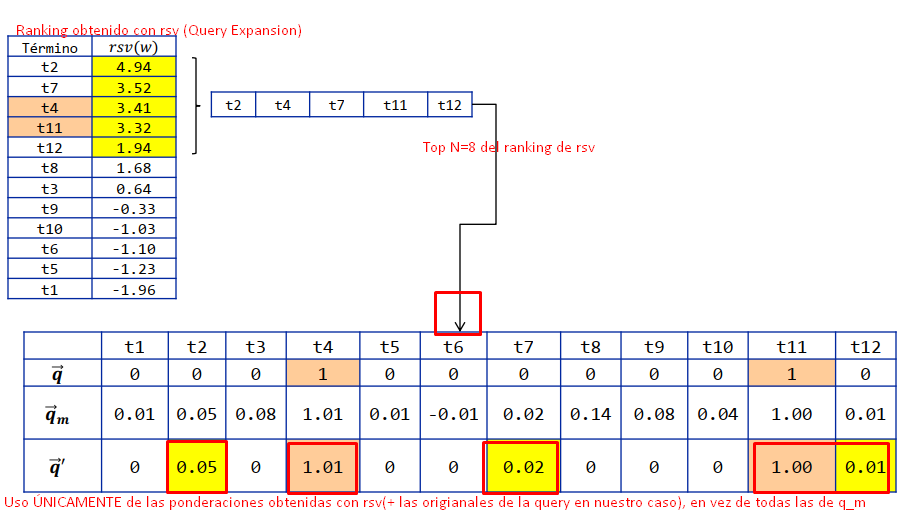

Lo primero que hacemos es obtener el vector de 0's y 1's de la query ampliada 

In [ ]:
q_expanded_weights = vsm.get_q_weights(expanded_query)

Tras haber debugeado, comprobamos que disponemos de un total de 10 palabras(5 palabras de la query y otras 5 de la expasion rsv)

In [ ]:
sum(q_expanded_weights)

10

Ahora para mezclar los dos métodos, multiplicamos q_w, con todos los pesos ajustandos escalarmente por q_expanded_weights, de modo que seleccionamos los pesos ajustados solo de las 10 palabras descritas:

In [ ]:
q_w_selected = q_w * q_expanded_weights

Para poder ver los pesos no nulos hacemos:

In [ ]:
not_null_weights = [i for i in list(q_w_selected) if i !=0]

In [ ]:
not_null_weights

[1.6237709650683383,
 1.9100625425640698,
 1.5408906564318954,
 0.9727819643578298,
 0.8457338319814856,
 1.2627730095533074,
 0.9860862077513686,
 1.2542107664871074,
 1.133530035587784,
 1.1052855231712386]

Que se corresponden con las palabras:

In [ ]:
expanded_query

['postres',
 'típicos',
 'por',
 'comunidad',
 'autónoma',
 'mazapán',
 'paparajotes',
 'mancha',
 'santiago',
 'navarra']

Ahora  **ya disponenemos de los pesos de la consulta expandida seleccionados**($\vec{q'}$, en la tabla explicativa). De igual modo que hacíamos en el apartado de Relevance Feedback, usamos esta consulta para **obtener el nuevo ranking:**

In [ ]:
vectorial_outputs_rocchio_expanded =  pd.DataFrame(columns=['qid', 'URL',	'Posicion',	'Score'])


i = 0
print('\nModelo vectorial(Relevance Feedback + Query Expansion)')
print('Score\t,' 'Doc_id')
for url, score in vsm.search_with_custom_q(np.array(q_w_selected)):
  i=i+1
  print(score, url)
  df2_rocchio_expanded = { 'docid': url, 'Posicion': i, 'Score': score}
  vectorial_outputs_rocchio_expanded = vectorial_outputs_rocchio_expanded.append(df2_rocchio_expanded, ignore_index = True)


Modelo vectorial(Relevance Feedback + Query Expansion)
Score	,Doc_id
0.26085000655222734 9
0.2179576912205057 17
0.20391482170742747 4
0.1973174251011003 2
0.1935685157193946 20
0.19272655815676804 8
0.18800649153300664 16
0.12446436579301218 3
0.11421348670329813 13
0.10949200356083917 1
0.0718296839908671 21
0.06562534829390997 7
0.06412399417889915 12
0.058281481813018066 14
0.057999956505439876 6
0.04977539811800429 19
0.03673367628454546 18
0.03164241356039258 0
0.02958164377836347 10
0.02846391552917182 11
0.012761593228390012 15


**Comparamos** ahora la mejora o no del ranking mediante métricas de evaluación en el **ERJECICIO 3**

# **EJERCICIO 3: Métricas:Precisión y nDCG**

### **COMPARATIVA DE LOS RANKINGS: Métricas de Evaluación**

**Disponemos de 4 rankings:**


1.   VSM original  con la consulta original
2.   Relevance Feedback(Rocchio), es decir todos los pesos de $q_m$
3.  Query Expansion(rsv), a la query orignal que le añadimosel top N=CUTOFF de términos y le pedimos el ranking para la query ampliada al modelo VSM.
4. Relevance Feedback(Rocchio) + Query Expansion(rsv), SOLO los pesos de los terminos dados por rsv en  $q_m$



**Recordamos** el listado de documentos relevantes según el criterio elegido en el apartado anterior:


In [ ]:
qrels = data2.loc[data2['Relevante']>0].reset_index(drop=True)
qrels

,docid,URL,Relevante
0,3,https://eco-turismo.info/gastronomia/postres-t...,1.0
1,4,https://okdiario.com/recetas/dia-mundial-postr...,1.0
2,8,https://www.65ymas.com/ocio/gastronomia/espana...,1.0
3,9,https://www.alimente.elconfidencial.com/gastro...,1.0
4,13,https://www.estudiahosteleria.com/blog/novedad...,1.0
5,16,https://www.lugarnia.com/gastronomia/postres-m...,1.0
6,17,https://www.niusdiario.es/vida/gastronomia/pos...,1.0
7,20,https://www.tapasmagazine.es/los-postres-tipic...,1.0


Y ahora **recordamos cada uno de los 4 rankings.**

1.   VSM original  con la consulta original:


In [ ]:
vectorial_outputs[['docid', 'Posicion', 'Score']].astype({"docid": int, "Posicion":int}, errors='raise') 

,docid,Posicion,Score
0,9,1,0.057538
1,4,2,0.046398
2,2,3,0.045436
3,16,4,0.043953
4,17,5,0.041684
5,8,6,0.040434
6,19,7,0.035137
7,1,8,0.030660
8,20,9,0.027219
9,21,10,0.025411


2.   Relevance Feedback(Rocchio), es decir todos los pesos de $q_m$


In [ ]:
vectorial_outputs_rocchio[['docid', 'Posicion', 'Score']].astype({"docid": int, "Posicion":int}, errors='raise') 

,docid,Posicion,Score
0,3,1,14.425874
1,16,2,13.926570
2,8,3,13.720614
3,9,4,13.083404
4,4,5,11.998669
5,20,6,11.825698
6,17,7,11.091687
7,13,8,10.819167
8,2,9,2.873186


3.  Query Expansion(rsv), a la query orignal que le añadimosel top N=CUTOFF de términos y le pedimos el ranking para la query ampliada al modelo VSM.


In [ ]:
vectorial_outputs_q_expa[['docid', 'Posicion', 'Score']].astype({"docid": int, "Posicion":int}, errors='raise') 

,docid,Posicion,Score
0,9,1,0.201723
1,17,2,0.162603
2,20,3,0.149667
3,4,4,0.148105
4,2,5,0.142363
5,8,6,0.138502
6,16,7,0.137864
7,3,8,0.097069
8,1,9,0.085752
9,13,10,0.082491


4. Relevance Feedback(Rocchio) + Query Expansion(rsv), SOLO los pesos de los terminos dados por rsv en  $q_m$

In [ ]:
vectorial_outputs_rocchio_expanded[['docid', 'Posicion', 'Score']].astype({"docid": int, "Posicion":int}, errors='raise') 

,docid,Posicion,Score
0,9,1,0.260850
1,17,2,0.217958
2,4,3,0.203915
3,2,4,0.197317
4,20,5,0.193569
5,8,6,0.192727
6,16,7,0.188006
7,3,8,0.124464
8,13,9,0.114213
9,1,10,0.109492


**Comparamos ahora los rankings, para ello importamos las métricas Precision y nDCG**

Precision:
Calculamos Precision como:
$$P = \frac{|Relevant \cap Returned|}{|Returned|}$$

Y Recall como:
$$R = \frac{|Relevant \cap Returned|}{|Relevant|}$$


La media armónica o F measure se define a partir de Precision y Recall tal que:
$$F = \frac{2RP}{R+P}$$

In [ ]:
def calc_metrics_por_consulta(qi_rels, qi_returned):
    '''
        Calcula precision y recall para una consulta
        Args:
            qi_rels:urls  relvantes para la consulta i
            qi_returned: urls  returned para la consulta i
    '''
    intersection = pd.merge(qi_rels, qi_returned, how='inner', on=['docid'])

    precision = len(intersection)/len(qi_returned)
    recall = len(intersection)/len(qi_rels)
    m_armonica = (2*precision*recall)/ (precision + recall)
    return  precision, recall, m_armonica 

nDCG:

Definimos el **nDCG o normalized Discounted Cumulative Gain** como

$$nDCG = \frac{DCG}{iDCG} $$

Siendo $$DCG = \sum_{d_{k} \in R} \frac{ rel(d_{k})}{ \log{k+1}} $$
y
$$ iDCG = \max{DCG(q)}  $$ 
es decir, para una consulta dada, el máximo DCG posible según los ordenes de relevancia en el ranking.

In [ ]:
def calc_nDCG(qi_rels_with_zeros, qi_returned):
    '''Calcula nDCG = DCG/iDCG
        Args:
            qi_rels_with_zeros: urls relevantes 
            qi_returned: urls  returned para la consulta i
    '''

    relevancia = 0
    dcg_values = [] 
    
    qi_ranking = qi_returned.sort_values(by=['Posicion'])
    intersection = pd.merge(qi_ranking, qi_rels_with_zeros, how='left', on=['docid'])
    intersection = intersection.fillna(0)
    #print('interseccion left join')
    #print(intersection)
    
    #Calculing the iDCG: ideal DCG
    rels = intersection['Relevante']
    rels = rels.sort_values( ascending=False)
    divisor = [np.log2(i+2) for i in range(len(rels.values)) ]#position+1 starting in 1
    idcg_values = [i/j for i,j in zip(rels.values, divisor) ]
    #print('idcg_values', idcg_values)
    idcg = np.sum(idcg_values)
    #print('idcg', idcg)

    
    #Calculing the DCG
    for i in range(len(intersection)):
        position = i+1
        doc = intersection.loc[intersection['Posicion'] == position]
        relevancia = doc['Relevante'].values[0]
        dcg_values.append(relevancia / np.log2(position +1))
           
    dcg =  np.sum(dcg_values)
    #print('dcg', dcg)

    return dcg/idcg

### **Precision, Recall y Media Armónica con Cutoff**

Dado que si devolvemos todos los documentos relevante, el orden no se tiene en cuanta en la **precisión, tomamos el top CUTTOFF_PRECISION para calcularla.**

In [ ]:
CUTTOFF_PRECISION = 9

In [ ]:
precision_ranking_1, recall_ranking_1,ma_ranking_1 = calc_metrics_por_consulta(qrels,vectorial_outputs.head(CUTTOFF_PRECISION))
print('Precisión Ranking 1: ', precision_ranking_1)
print('Recall Ranking 1: ',recall_ranking_1 )
print('Media Armónica Ranking 1: ',ma_ranking_1 )

Precisión Ranking 1:  0.6666666666666666
Recall Ranking 1:  0.75
Media Armónica Ranking 1:  0.7058823529411765


In [ ]:
precision_ranking_2,recall_ranking_2,ma_ranking_2 = calc_metrics_por_consulta(qrels,vectorial_outputs_rocchio.head(CUTTOFF_PRECISION))

print('Precisión Ranking 2: ',precision_ranking_2 )
print('Recall Ranking 2: ',recall_ranking_2 )
print('Media Armónica Ranking 2: ',ma_ranking_2 )

Precisión Ranking 2:  0.8888888888888888
Recall Ranking 2:  1.0
Media Armónica Ranking 2:  0.9411764705882353


In [ ]:
precision_ranking_3,recall_ranking_3,ma_ranking_3= calc_metrics_por_consulta(qrels,vectorial_outputs_q_expa.head(CUTTOFF_PRECISION))
print('Precisión Ranking 3: ',precision_ranking_3 )
print('Recall Ranking 3: ', recall_ranking_3)
print('Media Armónica Ranking 3: ',ma_ranking_3 )

Precisión Ranking 3:  0.7777777777777778
Recall Ranking 3:  0.875
Media Armónica Ranking 3:  0.823529411764706


In [ ]:
precision_ranking_4,recall_ranking_4,ma_ranking_4 = calc_metrics_por_consulta(qrels,vectorial_outputs_rocchio_expanded.head(CUTTOFF_PRECISION))
print('Precisión Ranking 4: ', precision_ranking_4)
print('Recall Ranking 4: ',recall_ranking_4 )
print('Media Armónica Ranking 4: ', ma_ranking_4)

Precisión Ranking 4:  0.8888888888888888
Recall Ranking 4:  1.0
Media Armónica Ranking 4:  0.9411764705882353


Vemos como mejoramos en las 3 ultimas alternativas las métricas del ranking original con la query origianl sin ningún tipo de retroalimentación(Ranking 1). 
Con la introduccion de reelvance feedback con **Rocchio**, **pasamos de una precisión del 66% a una del 88%.** Es decir, obtenemos una mejora muy considerable.

Si comparamos la propuesta original con query expansion mediante **rsv**(Robertson Selection Value), vemos como la mejora buena aunque menor, **del 66% al 78% de precisión.** Esto con la expansión en la query de los 5 términos con más puntuación en el rvs.

Si combinamos ambos métodos, Rocchio + rvs, ranking 4, vemos como volvemos a la mejora del 88%, con recall y media armónica con los mismos valores. Esto se debe a que son valores prefijados:  un cuttoff concreto de las métricas de evaluación, con un número de termino prefijado de 5 del método rvs, y para unos parámetros prefijados de alpha, betta y gamma para el método Rocchio.  Además hay que tener en cuenta en tamaño del la consulta:21 documentos con 8 relevantes. Por lo que esto no tiene por qué cumplirse en otros escenarios, de hecho muy probablemente no lo haga.

Sería interesante comprobarlo por ejemplo con otros hiperparámetros y ver la comparación(ejercicio opcional).

## **nDCG**

In [ ]:
nDCG_ranking_1 = calc_nDCG(data2.reset_index(drop=True), vectorial_outputs)
nDCG_ranking_1

0.9193554747981038

In [ ]:
nDCG_ranking_2 = calc_nDCG(data2.reset_index(drop=True), vectorial_outputs_rocchio)
nDCG_ranking_2

1.0

In [ ]:
nDCG_ranking_3 = calc_nDCG(data2.reset_index(drop=True), vectorial_outputs_q_expa)
nDCG_ranking_3

0.9752652438087495

In [ ]:
nDCG_ranking_4 = calc_nDCG(data2.reset_index(drop=True), vectorial_outputs_rocchio_expanded)
nDCG_ranking_4

0.9672068480996276

## **nDCG@10**

Testeamos ahora el nDCG con cutoff de 10 para comparar de nuevo los rankings:

In [ ]:
CUTOFF_nDCG = 10

In [ ]:
nDCG_ranking_1 = calc_nDCG(data2.reset_index(drop=True), vectorial_outputs.head(CUTOFF_nDCG))
nDCG_ranking_1

0.9397911964740513

In [ ]:
nDCG_ranking_2 = calc_nDCG(data2.reset_index(drop=True), vectorial_outputs_rocchio.head(CUTOFF_nDCG))
nDCG_ranking_2

1.0

In [ ]:
nDCG_ranking_3 = calc_nDCG(data2.reset_index(drop=True), vectorial_outputs_q_expa.head(CUTOFF_nDCG))
nDCG_ranking_3

0.9752652438087496

In [ ]:
nDCG_ranking_4 = calc_nDCG(data2.reset_index(drop=True), vectorial_outputs_rocchio_expanded.head(CUTOFF_nDCG))
nDCG_ranking_4

0.9672068480996276

Observamos el mismo comportamiento en nDCG con cutoff y sin cutoff.

Vemos como en ambos de nuevo se cumple lo que veíamos con precision, recall y media armónica: **coseguimos mejorar el ranking considerablemente.**

La utilidad obtenida para un usuario con el sistema original(ranking 1), a uno mediante el uso del método **Rocchio, pasa de un nDCG del 94% a un 100%** para nuestra consulta e hiperparámetros prefijados, así como juicios de relevancia elegidos.

El método **rvs** consigue por su parte también muy buenos resultados, aunque ligeramente menores que Rocchio, **alcanzamos un nDCG del 98%**

La combinación de ambos nos da una puntuación del 97%, lo cual con lo visto junto a las otras métricas, nos indica que es mejor usar el método Rocchio original, y no quitarle ponderaciones a los pesos mediante este método híbrido. 

# **EJERCICIO 7(OPCIONAL)**



**Probar valores diferentes de alfa, beta y gamma en Rocchio, diferentes cutoff en PRF, y/o diferente nº de términos de expansión.**

Vamos a hacer varias de las propuestas que se nos piden:

Los hiperparámetros elegidos en Rocchio eran:


In [ ]:
alpha = 1
betta = 0.8
gamma = 0.4

Es decir, la propuesta origianal

## **Variantes de Rocchio**

Vamos a hacer varios cambios en lo hiperpaámetros

### **Rocchio-Ide**

El la propuesta de Ide, los 3 hiperparámetros son 1:

In [ ]:
alpha_1= betta_1 =gamma_1 = 1

In [ ]:
rocchio_model_1 = Rocchio(alpha_1, betta_1, gamma_1, data2,matriz_tfidf)
q_w_1 ,_ = rocchio_model_1.amplia_query(query)

In [ ]:
vectorial_outputs_rocchio_1 =  pd.DataFrame(columns=['qid', 'URL',	'Posicion',	'Score'])


i = 0
print('\nModelo vectorial(With Relevance Feedback)')
print('Score\t,' 'Doc_id')
for url, score in vsm.search_with_custom_q(np.array(q_w_1)):
  i = i+1
  print(score, url)
  df2_rocchio_1 = { 'docid': url, 'Posicion': i, 'Score': score}
  vectorial_outputs_rocchio_1 = vectorial_outputs_rocchio_1.append(df2_rocchio_1, ignore_index = True)


Modelo vectorial(With Relevance Feedback)
Score	,Doc_id
15.23331871566623 3
14.138497708034786 16
13.524544762061721 8
13.52087972814511 9
11.672075805838281 13
11.518327998726578 17
11.489548823269343 20
11.242500150363652 4


Usando el mismo cutoff para precison,recall y media armócinoca:

In [ ]:
precision_ranking_4, recall_ranking_4,ma_ranking_4 = calc_metrics_por_consulta(qrels,vectorial_outputs_rocchio_1.head(CUTTOFF_PRECISION))
print('Precisión Ranking Rocchio Ide : ', precision_ranking_4)
print('Recall Ranking Rocchio Ide : ',recall_ranking_4 )
print('Media Armónica Ranking Rocchio Ide : ',ma_ranking_4 )

Precisión Ranking Rocchio Ide :  1.0
Recall Ranking Rocchio Ide :  1.0
Media Armónica Ranking Rocchio Ide :  1.0


Calculamos también nDCG:

In [ ]:
nDCG_ranking_4 = calc_nDCG(data2.reset_index(drop=True), vectorial_outputs_rocchio_1)
nDCG_ranking_4

1.0

Vemos como mejoramos todas las métricas hasta una puntuación perfecta, para lo que para la consulta dada, con lo cual esta porupesta no dá mejores resultados de entre todas las probadas hasta ahora. Sería interesante hacer la comparación con otra consulta para ver si también se cumple este comportamiento de mejora del método standard de Rocchio.

### **Rocchio con γ = 0**

Muchos sistemas usan γ < β, y otros γ = 0, vamos a ver como se desempeña esto para nuesra consulta:

In [ ]:
alpha_2 = 1
betta_2 = 0.9
gamma_2 = 0

In [ ]:
rocchio_model_2 = Rocchio(alpha_2, betta_2, gamma_2, data2,matriz_tfidf)
q_w_2 ,_ = rocchio_model_2.amplia_query(query)

In [ ]:
vectorial_outputs_rocchio_2 =  pd.DataFrame(columns=['qid', 'URL',	'Posicion',	'Score'])


i = 0
print('\nModelo vectorial(With Relevance Feedback)')
print('Score\t,' 'Doc_id')
for url, score in vsm.search_with_custom_q(np.array(q_w_2)):
  i = i+1
  print(score, url)
  df2_rocchio_2 = { 'docid': url, 'Posicion': i, 'Score': score}
  vectorial_outputs_rocchio_2 = vectorial_outputs_rocchio_2.append(df2_rocchio_2, ignore_index = True)


Modelo vectorial(With Relevance Feedback)
Score	,Doc_id
18.74046444756812 3
18.685139487692613 8
18.594750692285462 16
17.24872786375074 9
16.862515615475917 4
16.257699383202617 20
14.575210031198687 17
13.829638392996666 13
8.237046941267751 2
6.694190958034855 18
5.6592179417981665 19
5.498210699664567 7
5.046272697142283 12
4.939087748910602 1
4.651125202699506 14
4.360800615589712 21
3.7130498121472533 11
3.001444635445524 6
2.6689192358214737 10
2.3343009673530615 0
2.131724361478655 15
0.6438132047845907 5


In [ ]:
precision_ranking_5, recall_ranking_5,ma_ranking_5 = calc_metrics_por_consulta(qrels,vectorial_outputs_rocchio_2.head(CUTTOFF_PRECISION))
print('Precisión Ranking Rocchio Gamma = 0 : ', precision_ranking_5)
print('Recall Ranking Rocchio  Gamma = 0 : ',recall_ranking_5 )
print('Media Armónica Ranking Rocchio  Gamma = 0 : ',ma_ranking_5 )

Precisión Ranking Rocchio Gamma = 0 :  0.8888888888888888
Recall Ranking Rocchio  Gamma = 0 :  1.0
Media Armónica Ranking Rocchio  Gamma = 0 :  0.9411764705882353


In [ ]:
nDCG_ranking_5 = calc_nDCG(data2.reset_index(drop=True), vectorial_outputs_rocchio_2)
nDCG_ranking_5

1.0

Esta propuesta en nuestro caso no nos mejora la puntuación al igual que la propuesta de Ide. Además nos da valores de todas métricas muy similares, por lo que sería interesante probarlo con conjuntos de datos más grandes, para ver cual de las propuestas despunta más. Aunqeu ya sabemos que en nuestro caso es el método Rocchio-Ide

## **Modificamos los términos de expansión en Query Expansion**

En query expansión, obteniamos por rsv(Robertson Selection Value), un ranking de términos con los que ampliar la query. 
El número que fijamos fue de N = 5. Vamos a ver qué metricas obtenemos para otro número de términos elegidos.

Recordamos el ranking de términos obtenidos:

In [ ]:
ranking_rsv[0:18]

[('mazapán', 32.18237928744042),
 ('paparajotes', 32.18237928744042),
 ('mancha', 27.03805640339429),
 ('santiago', 27.03805640339429),
 ('navarra', 27.03805640339429),
 ('rioja', 27.03805640339429),
 ('quemado', 25.93684365008346),
 ('chufa', 25.93684365008346),
 ('fría', 25.93684365008346),
 ('espolvoreada', 25.93684365008346),
 ('santa', 24.811818645207165),
 ('baleares', 24.811818645207165),
 ('tarta', 24.811818645207165),
 ('murcia', 24.811818645207165),
 ('cantabria', 24.811818645207165),
 ('león', 24.811818645207165),
 ('canarias', 24.811818645207165),
 ('andalucía', 22.66570675244973)]

Y las métricas con con N=5 top términos de expansión:

In [ ]:
precision_ranking_3,recall_ranking_3,ma_ranking_3= calc_metrics_por_consulta(qrels,vectorial_outputs_q_expa.head(CUTTOFF_PRECISION))
print('Precisión Ranking 3: ',precision_ranking_3 )
print('Recall Ranking 3: ', recall_ranking_3)
print('Media Armónica Ranking 3: ',ma_ranking_3 )
nDCG_ranking_3 = calc_nDCG(data2.reset_index(drop=True), vectorial_outputs_q_expa)
print('nDCG Ranking 3: ',nDCG_ranking_3 )


Precisión Ranking 3:  0.7777777777777778
Recall Ranking 3:  0.875
Media Armónica Ranking 3:  0.823529411764706
nDCG Ranking 3:  0.9752652438087495


### **Términos de Expansion: N = 3**
Escogemos ahora 3 términos de expansión:

In [ ]:
expanded_query_3 =  ['postres', 'típicos', 'por', 'comunidad', 'autónoma', 'mazapán','paparajotes','mancha']

In [ ]:
vectorial_outputs_q_expa_3 =  pd.DataFrame(columns=['qid', 'URL',	'Posicion',	'Score'])

i = 0
print('Query Epxandida por rvs: ' ,expanded_query_3)
print('\nModelo vectorial, query expandida N=3 términos')
#print('Score\t,' 'Doc_id')
for url, score in vsm.search(expanded_query_3):
  i = i+1
  #print(score, url)
  df2_q_exp_3 = { 'docid': url, 'Posicion': i, 'Score': score}#Imrimimos por comodidad el docid y en vez del la url para identificar documentos
  vectorial_outputs_q_expa_3 = vectorial_outputs_q_expa_3.append(df2_q_exp_3, ignore_index = True)

Query Epxandida por rvs:  ['postres', 'típicos', 'por', 'comunidad', 'autónoma', 'mazapán', 'paparajotes', 'mancha']

Modelo vectorial, query expandida N=3 términos


In [ ]:
precision_ranking_6 ,recall_ranking_6,ma_ranking_6= calc_metrics_por_consulta(qrels,vectorial_outputs_q_expa_3.head(CUTTOFF_PRECISION))
print('Precisión Expansion N=3 : ',precision_ranking_6 )
print('Recall Expansion N=3 :', recall_ranking_6)
print('Media Armónica Expansion N=3 : ',ma_ranking_6 )
nDCG_ranking_6 = calc_nDCG(data2.reset_index(drop=True), vectorial_outputs_q_expa_3)
print('nDCG Ranking 3: ',nDCG_ranking_6 )

Precisión Expansion N=3 :  0.8888888888888888
Recall Expansion N=3 : 1.0
Media Armónica Expansion N=3 :  0.9411764705882353
nDCG Ranking 3:  0.949671989333555


Vemos como **mejoramos la precisión de un 77% a un 88%**, al igual que mejora recall y media armónica. 
Sien embargo bajamos la puntuación de nDCG de 98% a 95%.

### **Términos de Expansion: N = 10**

Escogemos ahora 10 términos de expansión:





In [ ]:
expanded_query_10 =  ['postres', 'típicos', 'por', 'comunidad', 'autónoma', 'mazapán','paparajotes','mancha', 'santiago', 'navarra', 'rioja', 'quemado', 'chufa', 'fría' , 'espolvoreada']

In [ ]:
vectorial_outputs_q_expa_10 =  pd.DataFrame(columns=['qid', 'URL',	'Posicion',	'Score'])

i = 0
print('Query Epxandida por rvs: ' ,expanded_query_10)
print('\nModelo vectorial, query expandida N=10 términos')
#print('Score\t,' 'Doc_id')
for url, score in vsm.search(expanded_query_10):
  i = i+1
  #print(score, url)
  df2_q_exp_10 = { 'docid': url, 'Posicion': i, 'Score': score}#Imrimimos por comodidad el docid y en vez del la url para identificar documentos
  vectorial_outputs_q_expa_10 = vectorial_outputs_q_expa_10.append(df2_q_exp_10, ignore_index = True)

Query Epxandida por rvs:  ['postres', 'típicos', 'por', 'comunidad', 'autónoma', 'mazapán', 'paparajotes', 'mancha', 'santiago', 'navarra', 'rioja', 'quemado', 'chufa', 'fría', 'espolvoreada']

Modelo vectorial, query expandida N=10 términos


In [ ]:
precision_ranking_7 ,recall_ranking_7,ma_ranking_7= calc_metrics_por_consulta(qrels,vectorial_outputs_q_expa_10.head(CUTTOFF_PRECISION))
print('Precisión Expansion N=3 : ',precision_ranking_7 )
print('Recall Expansion N=3 :', recall_ranking_7)
print('Media Armónica Expansion N=3 : ',ma_ranking_7 )
nDCG_ranking_7 = calc_nDCG(data2.reset_index(drop=True), vectorial_outputs_q_expa_10)
print('nDCG Ranking 3: ',nDCG_ranking_7 )

Precisión Expansion N=3 :  0.7777777777777778
Recall Expansion N=3 : 0.875
Media Armónica Expansion N=3 :  0.823529411764706
nDCG Ranking 3:  0.9888026041880241


Vemos como con 10 términos, con conseguimos mejorar ninguna de las métricas, respecto a N=5, ya que ambas siguen teneindo valores similares

Para las 2 configuraciones, no hemos obtenidos resultados relevantes de mejora respecto a la opcion original de N=5 términos de expansión.

Sería interesante ver esta prueba en un conjunto más grande, para ver si realmente consegruiríamos mejorar alguna de las métricas. A diferencia de las variaciones en los hiperparámetros de Rocchio, aqui no está tan clara la posible mejora en función de los hiperparámetros del método de selección de valores de robertson(rsv).

**El método de Rocchio ha resultado ser en el presente trabajo el método que mejores resultados ofrece, como mejora de las métricas de los rankings de búsqueda.**

# **EJERCICIO 8(OPCIONAL)**

**Probar con diferentes consultas y comparar si los resultados que se obtienen son consistentes con los obtenidos usando la consulta de los primeros apartados**

Usaremos para comparar el método de **Rocchio  Standard, con los mismo hiperparámtros que en el ejercicio 2**, por ser el método que mejores resultados obteníamos(quitando uno de los ajustes que con el que obteníamos metricas del 100%)

Es decir, que usando una nueva consulta, compararemos la precisión y nDCG del ranking obtenido, antes de aplicar Rocchio y despues de aplicar Rocchio, es decir, un método de Relevance Feedback.


Escogemos otra consulta, en este caso será la **consulta: **

In [ ]:
query = ['mejores', 'peliculas', '2021-22']

**Procedemos a calcular las métricas como hacíamos en el ejercicio 2, para compararlas con esta consulta:**


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving q8.csv to q8.csv


In [ ]:
q8 = pd.read_csv('q8.csv')
q8 = q8.drop(['Indicaciones'] , axis=1)
q8 = q8.drop(['Ignorar_campo'] , axis=1)
q8 = q8.drop(['Unnamed: 5'] , axis=1)
q8['docid']= [ i for i in range(q8.shape[0]) ]

q8.head()

,qid,URL,Nivel_de_acierto,docid
0,8,https://m.filmaffinity.com/es/ranking.php?rn=r...,2,0
1,8,https://www.fotogramas.es/noticias-cine/g32027...,2,1
2,8,https://www.sensacine.com/noticias/cine/notici...,1,2
3,8,https://www.peliculas21.com/peliculas-de-accio...,0,3
4,8,https://verpeliculasultra.com/xfsearch/pelicul...,0,4


In [ ]:

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

headers = {
        'Access-Control-Allow-Origin': '*',
        'Access-Control-Allow-Methods': 'GET',
        'Access-Control-Allow-Headers': 'Content-Type',
        'accept': '*/*',
        'accept-encoding': 'gzip, deflate',
        'accept-language': 'en,mr;q=0.9',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36'}

data =  q8.copy(deep=True)

headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/68.0.3440.106 Safari/537.36',}
texts = []  

for j in range(len(q8)):
  url = q8['URL'][j]
  content = requests.get(url,headers=headers,  verify=False).content
  soup = BeautifulSoup(content, "lxml")
  for script in soup(["script", "style"]): script.extract()
  text = soup.text.lower()
  texts.append(text)

data.insert(3, "text", texts)


In [ ]:
vectorial_outputs_8 =  pd.DataFrame(columns=['qid', 'URL',	'Posicion',	'Score'])


texts_2 = data['text'].to_list()
#urls_2 = data['URL'].to_list()
urls_2 = data['docid'].to_list()

freqvector = {url:Counter([word for word in re.findall(r"[^\W\d_]+|\d+", text.lower()) ]) for url, text in zip(urls_2, texts_2)}
# Document frequency para cada palabra del vocabulario.
vocabulary = set()
for word in freqvector.values(): vocabulary.update(word)
docfreqs = {word:len([url for url in freqvector if word in freqvector[url]]) for word in vocabulary}
# Frecuencia total para cada palabra del vocabulario.
wordfreqs = {word:sum([freqvector[url][word] for url in freqvector if word in freqvector[url]]) for word in vocabulary}
#Probamos su query
print('\n--------------------------------------')


i = 0
print('\nModelo vectorial')
vsm = VSM(freqvector, docfreqs)
#print('Score\t,' 'Doc_id')
for url, score in vsm.search(query):
  i = i+1
  #print(score, url)
  df2_8 = { 'docid': url, 'Posicion': i, 'Score': score}#Imrimimos por comodidad el docid y en vez del la url para identificar documentos
  vectorial_outputs_8 = vectorial_outputs_8.append(df2_8, ignore_index = True)



--------------------------------------

Modelo vectorial


In [ ]:
matriz_tfidf = vsm.tf_idf()

**Obtenemos los siguientes documentos para esta consulta:**

In [ ]:
rels_clicks = pd.read_csv('engagement-log.txt', sep='\t')
rels_clicks = rels_clicks.loc[rels_clicks['qid']==8].reset_index(drop= True)[['docid','click','purchase']]
rels_clicks = rels_clicks.rename(columns={"docid": "URL"}).drop_duplicates()
data2 = data.merge(rels_clicks , how= 'left' , on= 'URL').fillna(0)
data2 = data2[['docid', 'URL','click']]
data2 = data2.rename(columns={"click": "Relevante"}).drop_duplicates()



Usamos los mismo hiperparámetros de Rocchio que en el ejercicio 2:

In [ ]:
alpha = 1
betta = 0.8
gamma = 0.4

In [ ]:
rocchio_model = Rocchio(alpha, betta, gamma, data2,matriz_tfidf)
q_w ,q_0 = rocchio_model.amplia_query(query)



vectorial_outputs_rocchio_8 =  pd.DataFrame(columns=['qid', 'URL',	'Posicion',	'Score'])


i = 0
print('\nModelo vectorial(With Relevance Feedback)')
#print('Score\t,' 'Doc_id')
for url, score in vsm.search_with_custom_q(np.array(q_w)):
  i = i+1
  #print(score, url)
  df2_rocchio_8 = { 'docid': url, 'Posicion': i, 'Score': score}
  vectorial_outputs_rocchio_8 = vectorial_outputs_rocchio_8.append(df2_rocchio_8, ignore_index = True)


Modelo vectorial(With Relevance Feedback)


### **Resultados Métricas**

Comparamos ahora el resutado de las métricas(para la consulta número 8 de la práctica 2), como mejora el ranking original si le aplicamos Relevance Feedback con rocchio estándar.

Vamos a ver Ranking VSM Original vs. Ranking con Relevance Feedback:

In [ ]:
qrels = data2.loc[data2['Relevante']>0].reset_index(drop=True)
precision_ranking_8_1, recall_ranking_8_1,ma_ranking_8_1 = calc_metrics_por_consulta(qrels,vectorial_outputs_8.head(CUTTOFF_PRECISION))
print('Precisión Ranking 8 Query Original: ', precision_ranking_8_1)
print('Recall Ranking 8 Query Original: ',recall_ranking_8_1 )
print('Media Armónica Ranking 8 Query Original: ',ma_ranking_8_1 )
nDCG_ranking_8_1 = calc_nDCG(data2.reset_index(drop=True), vectorial_outputs_8)
print('nDCG Ranking 8: ',nDCG_ranking_8_1 )

Precisión Ranking 8 Query Original:  0.2222222222222222
Recall Ranking 8 Query Original:  0.2222222222222222
Media Armónica Ranking 8 Query Original:  0.2222222222222222
nDCG Ranking 8:  0.6350796471684474


In [ ]:
qrels = data2.loc[data2['Relevante']>0].reset_index(drop=True)
precision_ranking_8, recall_ranking_8,ma_ranking_8 = calc_metrics_por_consulta(qrels,vectorial_outputs_rocchio_8.head(CUTTOFF_PRECISION))
print('Query Original:', query)
print('Precisión Ranking 8: ', precision_ranking_8)
print('Recall Ranking 8: ',recall_ranking_8 )
print('Media Armónica Ranking 8: ',ma_ranking_8 )
nDCG_ranking_8 = calc_nDCG(data2.reset_index(drop=True), vectorial_outputs_rocchio_8)
print('nDCG Ranking 8: ',nDCG_ranking_8 )

Query Original: ['mejores', 'peliculas', '2021-22']
Precisión Ranking 8:  0.7777777777777778
Recall Ranking 8:  0.7777777777777778
Media Armónica Ranking 8:  0.7777777777777778
nDCG Ranking 8:  0.9554001661684155


**Observamos una mejora clarísima , hemos pasado de un accuracy del 22% con la consulta original, a uno de 78% con el método de Relevance Feedback de Rocchio.El nDCG también ha mejorado, pasando del 64% al 96%**
**,es decir, la mejora es mucho más grande que para la consulta del ejercicio 2, usando el mismo método, que recordamos que era:**

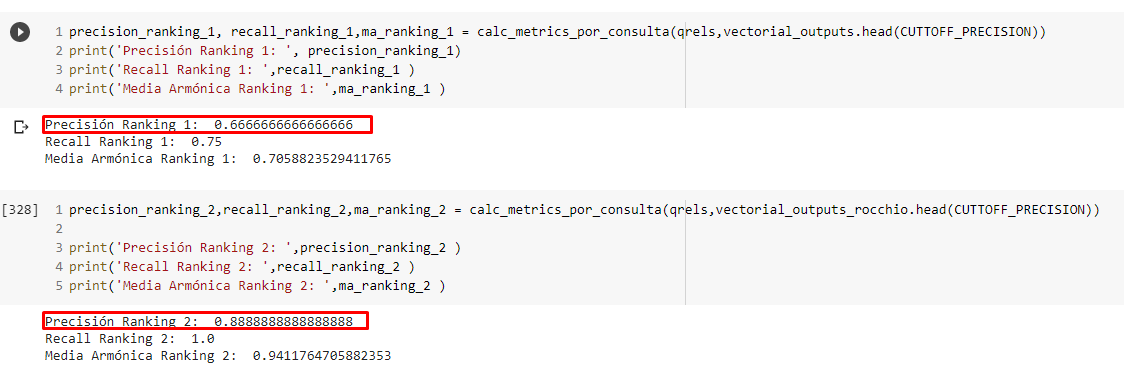

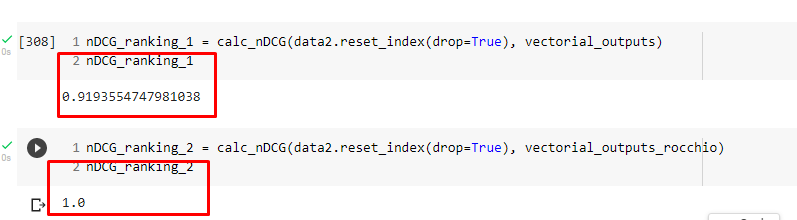

Es decir, la mejora en el ejercicio 2 era bastante notable, pero el salto del accuracy por ejemplo era del 66% al 88%, es decir, de un 22%, **mientras que con esta consulta, la mejora con Rocchio es del 55%.**

**De manera similar ocurre el caso con el crecimiento del nDCG cuando antes la mejora era del 6%, con esta consulta es del 31%(Paso de nDCG de 65% a 96%)**

# **REFERENCIAS**

[1]  Lecture 7: Relevance Feedback and Query Expansion Information Retrieval
Computer Science Tripos Part IIhttps://www.cl.cam.ac.uk/teaching/1718/InfoRtrv/slides/lecture7-relevance-feedback.pdf